# **Sports Analytics**

## **Using F I F A 2 3 Official Dataset Predict Player Performance**

### **The dataset contains 63 columns, each representing a different attribute of a football player.**

ID: A unique identifier for each player.

Name: The player's full name.

Age: The player's age.

Photo: A URL to the player's photo.

Nationality: The player's nationality.

Flag: A URL to the flag of the player's country.

Overall: The player's overall rating based on various attributes.

Potential: The player's potential rating, which indicates their peak performance.

Club: The name of the club the player is currently playing for.

Club Logo: A URL to the logo of the player's club.

Value: The player's estimated market value.

Wage: The player's weekly wage.

Special: A special rating based on how unique or outstanding the player's skills are.

Preferred Foot: Whether the player prefers their left or right foot.

International Reputation: A score indicating the player's international reputation (higher means more well-known globally).

Weak Foot: The player's skill level with their non-dominant foot.

Skill Moves: The player's proficiency with skill moves (rated out of 5 stars).

Work Rate: The player's work rate in both attack and defense (e.g., "High/Medium").

Body Type: The player's physical build (e.g., lean, stocky).

Real Face: Whether the player's face is realistically rendered in the game (True/False).

Position: The player's primary playing position (e.g., ST, CM).

Jersey Number: The player's squad number.

Joined: The date the player joined their current club.

Loaned From: The club the player is loaned from (if applicable).

Contract Valid Until: The year the player's contract with their current club expires.

Height: The player's height (in feet and inches).

Weight: The player's weight (in pounds).

Crossing: The player's ability to deliver accurate crosses.

Finishing: The player's ability to score from chances.

HeadingAccuracy: The player's accuracy with headers.

ShortPassing: The player's ability to pass the ball accurately over short distances.

Volleys: The player's ability to strike the ball mid-air (volleys).

Dribbling: The player's ability to move with the ball while controlling it closely.

Curve: The player's ability to bend the ball in the air (curve shots or passes).

FKAccuracy: The player's ability to take accurate free kicks.

LongPassing: The player's ability to deliver long-distance passes accurately.

BallControl: The player's ability to control the ball in various situations.

Acceleration: How quickly the player can reach top speed.

SprintSpeed: The player's top running speed.

Agility: How quickly the player can change direction.

Reactions: The player's reaction time to in-game events.

Balance: The player's ability to maintain balance, especially in duels or when dribbling.

ShotPower: The power behind the player's shots.

Jumping: The player's jumping ability.

Stamina: The player's endurance, representing how long they can maintain their energy.

Strength: The player's physical strength in duels.

LongShots: The player's accuracy when shooting from long distances.

Aggression: The player's intensity in challenging for the ball.

Interceptions: The player's ability to read the game and intercept passes.

Positioning: The player's ability to position themselves well on the field.

Vision: The player's awareness of their teammates' positions.

Penalties: The player's accuracy in taking penalty kicks.

Composure: The player's ability to remain calm under pressure.

Marking: The player's ability to mark opponents effectively.

StandingTackle: The player's skill at standing tackles.

SlidingTackle: The player's skill at sliding tackles.

GKDiving: (Goalkeepers only) The goalkeeper's diving ability.

GKHandling: (Goalkeepers only) The goalkeeper's ability to catch the ball.

GKKicking: (Goalkeepers only) The goalkeeper's kicking accuracy and distance.

GKPositioning: (Goalkeepers only) The goalkeeper's positioning awareness.

GKReflexes: (Goalkeepers only) The goalkeeper's reaction speed.

Best Position: The player's best-suited position on the field.

Best Overall Rating:


In [5203]:
import re
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5204]:
df = pd.read_csv("FIFA17_official_data.csv")

## **Data Understanding**

In [5205]:
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating
0,176580,L. Suárez,29,https://cdn.sofifa.com/players/176/580/17_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,92,92,FC Barcelona,https://cdn.sofifa.com/teams/241/light_30.png,...,30.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0
1,178518,R. Nainggolan,28,https://cdn.sofifa.com/players/178/518/17_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,86,86,Roma,https://cdn.sofifa.com/teams/52/light_30.png,...,78.0,85.0,88.0,11.0,11.0,14.0,8.0,11.0,CDM,84.0
2,181872,A. Vidal,29,https://cdn.sofifa.com/players/181/872/17_60.png,Chile,https://cdn.sofifa.com/flags/cl.png,87,87,FC Bayern München,https://cdn.sofifa.com/teams/21/light_30.png,...,76.0,89.0,84.0,4.0,2.0,4.0,2.0,4.0,CDM,85.0
3,197445,D. Alaba,24,https://cdn.sofifa.com/players/197/445/17_60.png,Austria,https://cdn.sofifa.com/flags/at.png,86,89,FC Bayern München,https://cdn.sofifa.com/teams/21/light_30.png,...,81.0,83.0,83.0,5.0,7.0,14.0,15.0,9.0,LB,84.0
4,195864,P. Pogba,23,https://cdn.sofifa.com/players/195/864/17_60.png,France,https://cdn.sofifa.com/flags/fr.png,88,94,Manchester United,https://cdn.sofifa.com/teams/11/light_30.png,...,68.0,73.0,73.0,5.0,6.0,2.0,4.0,3.0,CAM,85.0


In [5206]:
print("Number of rows: ",df.shape[0])
print("Number of columns: ",df.shape[1])

Number of rows:  17560
Number of columns:  63


#### The dataset contains data for 17,560 players, with 63 different features for each player.

In [5207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17560 entries, 0 to 17559
Data columns (total 63 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        17560 non-null  int64  
 1   Name                      17560 non-null  object 
 2   Age                       17560 non-null  int64  
 3   Photo                     17560 non-null  object 
 4   Nationality               17560 non-null  object 
 5   Flag                      17560 non-null  object 
 6   Overall                   17560 non-null  int64  
 7   Potential                 17560 non-null  int64  
 8   Club                      17317 non-null  object 
 9   Club Logo                 17560 non-null  object 
 10  Value                     17560 non-null  object 
 11  Wage                      17560 non-null  object 
 12  Special                   17560 non-null  int64  
 13  Preferred Foot            17560 non-null  object 
 14  Intern

## **Summary Statistics**

In [5208]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,17560.0,205606.310308,33102.038643,16.0,191486.0,212936.0,229670.0,241056.0
Age,17560.0,24.576310,4.653748,15.0,21.0,24.0,28.0,46.0
Overall,17560.0,66.155125,7.013210,45.0,62.0,66.0,71.0,94.0
Potential,17560.0,70.938326,6.140487,45.0,67.0,71.0,75.0,94.0
Special,17560.0,1595.468223,269.862012,751.0,1452.0,1633.0,1786.0,2291.0
International Reputation,17560.0,1.111902,0.385032,1.0,1.0,1.0,1.0,5.0
Weak Foot,17560.0,2.935820,0.657838,1.0,3.0,3.0,3.0,5.0
Skill Moves,17560.0,2.305410,0.746962,1.0,2.0,2.0,3.0,5.0
Jersey Number,17541.0,20.411265,17.047842,1.0,9.0,18.0,27.0,99.0
Crossing,17560.0,49.778360,18.423713,6.0,38.0,54.0,64.0,91.0


## Missing Values

### Checking

In [5209]:
missing_values = df.isna().sum()
missing_values_col = missing_values[missing_values > 0]
missing_values_col

Club                      243
Position                   19
Jersey Number              19
Joined                   1695
Loaned From             16227
Contract Valid Until      362
dtype: int64

i. **Club** column has **243** missing values, Club is used as an identifier, so we can't replace the missing value with median or mode. Therefore, we **drop** the rows having missing values.

ii. **Position** column has **19** missing values, we can fill the missing values with **Best Position**.

iii. **Jersey Number** column has **19** missing values, and it can be filled with available numbers within their respective clubs.

iv. **Loaned From** column has **16227** missing values out of 17560. So we can **drop** it.

v. **Joined** column has **1695** missing values. After extracting the 'year' we can replace the missing values with mode.

vi. **Contract Valid Until** column has **362** missing values, which we can replace with mode.

### Handling

#### Club

In [5210]:
df['Club'].isna().sum()

243

In [5211]:
# Dopping the rows in 'Club' having missing values
df.dropna(subset=['Club'], inplace=True)

In [5212]:
df['Club'].isna().sum()

0

#### Jersey Number

In [5213]:
df['Jersey Number'].isna().sum()

0

We understand that players without 'Jersey Number' were the same players without a 'Club'.  
Since we already dropped the players without 'Club', the missing values issue for 'Jersey Number' was also resolved.

#### Position

In [5214]:
df['Position'].isna().sum()

0

We understand that players without 'Jersey Number' were the same players without a 'Club'.  
Since we already dropped the players without 'Club', the missing values issue for 'Jersey Number' was also resolved.

#### Joined and Contract Valid Until

In [5215]:
df[['Joined', 'Contract Valid Until']].isna().sum()

Joined                  1452
Contract Valid Until     119
dtype: int64

In [5216]:
# extract the 'Year' from 'Joined' and 'Contract Valid Until' and update the respective columns inplace
df['Joined'] = df['Joined'].str.extract(r'\b(\d{4})\b')
df['Contract Valid Until'] = df['Contract Valid Until'].str.extract(r'\b(\d{4})\b')

In [5217]:
# Fill missing values with mode
df['Joined']=df['Joined'].fillna(df['Joined'].mode() [0])
df['Contract Valid Until']=df['Contract Valid Until'].fillna(df['Contract Valid Until'].mode() [0])

# Change dtype from object to numeric
df['Joined'] = df['Joined'].astype('int64')
df['Contract Valid Until'] = df['Contract Valid Until'].astype('int64')

In [5218]:
df[['Joined', 'Contract Valid Until']].isna().sum()

Joined                  0
Contract Valid Until    0
dtype: int64

## Duplicate Values

## Dropping Columns

In [5219]:
# drop columns that have no importance to player performance
df.drop(columns=['ID', 'Photo', 'Flag', 'Club Logo','Real Face', 'Loaned From'], axis=1, inplace=True)

#### Rows

In [5220]:
df.duplicated().sum()

0

#### Columns

In [5221]:
df.columns.duplicated().sum()

0

## Exploratory Data Analysis

In [5222]:
df.shape

(17317, 57)

### Formatting 'Value' and 'Wage'

#### Removing '€' symbol

In [5223]:
# Checking whether all values are defined in Euros or not
df.loc[df['Value'].str.startswith('€')].shape[0] == df.shape[0]

True

In [5224]:
# Checking whether all wages are defined in Euros or not
df.loc[df['Wage'].str.startswith('€')].shape[0] == df.shape[0]

True

In [5225]:
# Splitting the value column to get just the numeric
df['Value'] = df['Value'].str.split('€')
df['Value'] = df['Value'].apply(lambda x:x[1])

In [5226]:
#Splitting the wage column to get just the numeric
df['Wage'] = df['Wage'].str.split('€')
df['Wage'] = df['Wage'].apply(lambda x:x[1])

#### Converting all prices to millions

In [5227]:
# Appending 'M' to 'Value'=0 and 'Wage'=0 
for i in range(len(df)):
    if(df.iloc[i, df.columns.get_loc('Value')]=='0'):
        df.iloc[i, df.columns.get_loc('Value')] = '0M'
    elif (df.iloc[i, df.columns.get_loc('Wage')]=='0'):
        df.iloc[i, df.columns.get_loc('Wage')] = '0M'

##### Value

In [5228]:
# Dataframe of entries with 'Value' ending with 'K'
df_value_K = df.loc[df['Value'].str.endswith('K')]

# Dataframe of entries with 'Value' ending with 'M'
df_value_M = df.loc[df['Value'].str.endswith('M')]

In [5229]:
df_value_K.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating
263,M. Velázquez,35,Argentina,75,75,Club Atlético Lanús,625K,10K,2068,Left,...,77.0,77.0,63.0,12.0,12.0,16.0,8.0,11.0,CDM,76.0
397,L. Ibáñez,27,Argentina,69,69,Trabzonspor,825K,15K,2038,Left,...,65.0,66.0,63.0,11.0,7.0,10.0,13.0,8.0,LM,71.0
486,G. Zusi,29,United States,70,70,Sporting Kansas City,975K,7K,2022,Right,...,64.0,65.0,64.0,14.0,9.0,15.0,13.0,12.0,CM,73.0
509,C. Brunt,31,Northern Ireland,69,69,West Bromwich Albion,650K,20K,2018,Left,...,65.0,70.0,62.0,11.0,13.0,6.0,16.0,7.0,CAM,74.0
554,S. Mauri,36,Italy,73,73,Brescia,325K,4K,2012,Left,...,56.0,68.0,63.0,8.0,12.0,6.0,5.0,13.0,ST,73.0


In [5230]:
df_value_M.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating
0,L. Suárez,29,Uruguay,92,92,FC Barcelona,83M,525K,2291,Right,...,30.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0
1,R. Nainggolan,28,Belgium,86,86,Roma,37.5M,130K,2290,Right,...,78.0,85.0,88.0,11.0,11.0,14.0,8.0,11.0,CDM,84.0
2,A. Vidal,29,Chile,87,87,FC Bayern München,41.5M,180K,2285,Right,...,76.0,89.0,84.0,4.0,2.0,4.0,2.0,4.0,CDM,85.0
3,D. Alaba,24,Austria,86,89,FC Bayern München,41.5M,140K,2279,Left,...,81.0,83.0,83.0,5.0,7.0,14.0,15.0,9.0,LB,84.0
4,P. Pogba,23,France,88,94,Manchester United,71.5M,225K,2271,Right,...,68.0,73.0,73.0,5.0,6.0,2.0,4.0,3.0,CAM,85.0


In [5231]:
# Converting the player value in thousand Euros to Million Euros and then stripping the end denote.
df_value_K.loc[:, 'Value'] = df_value_K['Value'].apply(lambda x: x[:-1])
df_value_K.loc[:, 'Value'] = df_value_K['Value'].astype('float64')
df_value_K.loc[:, 'Value'] = df_value_K['Value'] / 1000

# Stripping the end denote for Million Euros Player value
df_value_M.loc[:, 'Value'] = df_value_M.loc[:, 'Value'].apply(lambda x: x[:-1])
df_value_M.loc[:, 'Value'] = df_value_M['Value'].astype('float64')

##### Wage

In [5232]:
# Checking if any value in df_value_K has 'Wage' which ends with 'M'
len(df_value_K.loc[df_value_K['Wage'].str.endswith("M")])

0

In [5233]:
# Checking if any value in df_value_M has 'Wage' which ends with 'M'
len(df_value_M.loc[df_value_M['Wage'].str.endswith("M")])

0

In [5234]:
# Converting the player wage in df_value_K in thousand Euros to Million Euros and then stripping the end denote.
df_value_K.loc[:, 'Wage'] = df_value_K['Wage'].apply(lambda x: x[:-1])
df_value_K.loc[:, 'Wage'] = df_value_K['Wage'].astype('float64')
df_value_K.loc[:, 'Wage'] = df_value_K['Wage'] / 1000

# Converting the player wage in df_value_M in thousand Euros to Million Euros and then stripping the end denote.
df_value_M.loc[:, 'Wage'] = df_value_M['Wage'].apply(lambda x: x[:-1])
df_value_M.loc[:, 'Wage'] = df_value_M['Wage'].astype('float64')
df_value_M.loc[:, 'Wage'] = df_value_M['Wage'] / 1000

##### Concatenating both the splitted up dataframes

In [5235]:

df = pd.concat([df_value_M,df_value_K])
df['Value'] = df['Value'].astype('float64')
df['Wage'] = df['Wage'].astype('float64')
df.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating
0,L. Suárez,29,Uruguay,92,92,FC Barcelona,83.0,0.525,2291,Right,...,30.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0
1,R. Nainggolan,28,Belgium,86,86,Roma,37.5,0.130,2290,Right,...,78.0,85.0,88.0,11.0,11.0,14.0,8.0,11.0,CDM,84.0
2,A. Vidal,29,Chile,87,87,FC Bayern München,41.5,0.180,2285,Right,...,76.0,89.0,84.0,4.0,2.0,4.0,2.0,4.0,CDM,85.0
3,D. Alaba,24,Austria,86,89,FC Bayern München,41.5,0.140,2279,Left,...,81.0,83.0,83.0,5.0,7.0,14.0,15.0,9.0,LB,84.0
4,P. Pogba,23,France,88,94,Manchester United,71.5,0.225,2271,Right,...,68.0,73.0,73.0,5.0,6.0,2.0,4.0,3.0,CAM,85.0


### Formatting 'Position'

In [5236]:
df['Position'] = df['Position'].apply(lambda x: re.sub(r'<[^>]+>', '', x))
df['Position'].unique()

array(['ST', 'LF', 'LDM', 'LB', 'RW', 'SUB', 'RCM', 'LW', 'RB', 'RDM',
       'RES', 'LCM', 'CDM', 'LM', 'CAM', 'RM', 'RS', 'LCB', 'RCB', 'CB',
       'CM', 'LS', 'RF', 'LWB', 'RAM', 'RWB', 'LAM', 'CF', 'GK'],
      dtype=object)

### Formatting 'Height'

In [5237]:
# Function to convert height to feet as a float
def height_to_feet(height):
    match = re.match(r"(\d+)'(\d+)", height)  # Extract feet and inches
    if match:
        feet = int(match.group(1))               # Extract feet as integer
        inches = int(match.group(2))             # Extract inches as integer
        total_feet = feet + inches / 12.0        # Convert inches to feet
        return round(total_feet,1)
    return None  # Return None if height format is invalid

# Apply the function to the 'Height' column
df['Height'] = df['Height'].apply(height_to_feet)
df['Height'].unique()

array([6. , 5.8, 5.9, 6.2, 5.7, 5.6, 6.1, 5.5, 5.4, 6.3, 6.4, 6.5, 5.3,
       5.2, 6.6, 6.7, 5.1, 6.8])

### Formatting 'Weight'

In [5238]:
df['Weight'] = df['Weight'].apply(lambda x : x[:-3])
df['Weight'] = df['Weight'].astype('int64')
df['Weight'].unique()

array([190, 143, 165, 168, 185, 163, 148, 154, 176, 161, 159, 150, 134,
       170, 172, 198, 183, 194, 152, 137, 179, 196, 174, 146, 201, 157,
       132, 181, 139, 128, 209, 141, 192, 187, 203, 207, 205, 126, 123,
       130, 212, 214, 121, 216, 119, 115, 218, 220, 225, 110, 117, 243,
       106, 108, 236, 223])

## Outliers

In [5239]:
num_df = df.select_dtypes(include='number')
num_col = num_df.columns.tolist()
print(num_col)

['Age', 'Overall', 'Potential', 'Value', 'Wage', 'Special', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Jersey Number', 'Joined', 'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Best Overall Rating']


In [5240]:
cat_df = df.select_dtypes(include='object')
cat_col = cat_df.columns.tolist()
print(cat_col)

['Name', 'Nationality', 'Club', 'Preferred Foot', 'Work Rate', 'Body Type', 'Position', 'Best Position']


In [5241]:
list(enumerate(num_col))

[(0, 'Age'),
 (1, 'Overall'),
 (2, 'Potential'),
 (3, 'Value'),
 (4, 'Wage'),
 (5, 'Special'),
 (6, 'International Reputation'),
 (7, 'Weak Foot'),
 (8, 'Skill Moves'),
 (9, 'Jersey Number'),
 (10, 'Joined'),
 (11, 'Contract Valid Until'),
 (12, 'Height'),
 (13, 'Weight'),
 (14, 'Crossing'),
 (15, 'Finishing'),
 (16, 'HeadingAccuracy'),
 (17, 'ShortPassing'),
 (18, 'Volleys'),
 (19, 'Dribbling'),
 (20, 'Curve'),
 (21, 'FKAccuracy'),
 (22, 'LongPassing'),
 (23, 'BallControl'),
 (24, 'Acceleration'),
 (25, 'SprintSpeed'),
 (26, 'Agility'),
 (27, 'Reactions'),
 (28, 'Balance'),
 (29, 'ShotPower'),
 (30, 'Jumping'),
 (31, 'Stamina'),
 (32, 'Strength'),
 (33, 'LongShots'),
 (34, 'Aggression'),
 (35, 'Interceptions'),
 (36, 'Positioning'),
 (37, 'Vision'),
 (38, 'Penalties'),
 (39, 'Composure'),
 (40, 'Marking'),
 (41, 'StandingTackle'),
 (42, 'SlidingTackle'),
 (43, 'GKDiving'),
 (44, 'GKHandling'),
 (45, 'GKKicking'),
 (46, 'GKPositioning'),
 (47, 'GKReflexes'),
 (48, 'Best Overall Rating'

48
51


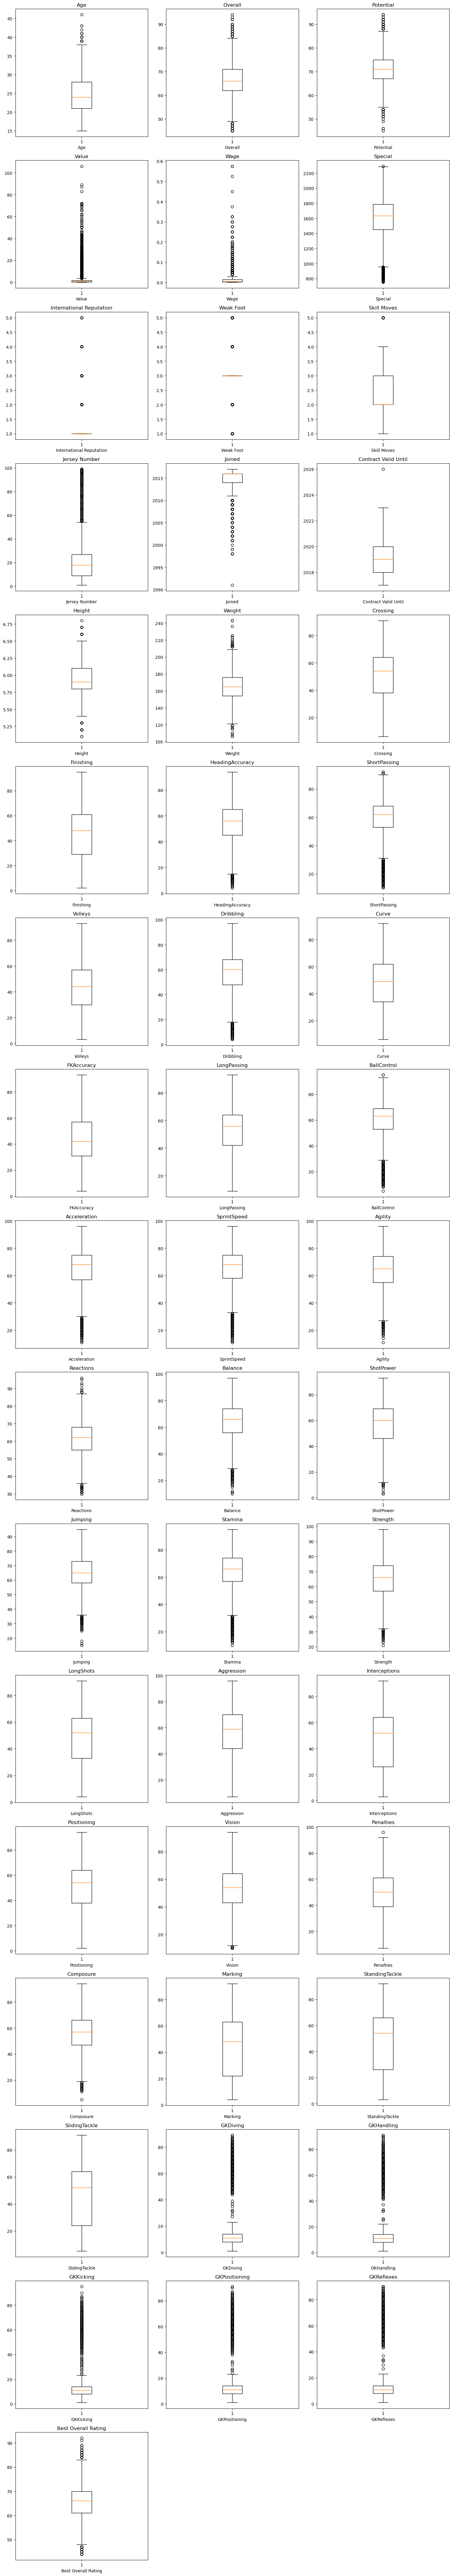

In [5242]:
# Define the number of columns and rows for the subplots
n_cols = 3  # Number of subplots per row
n_rows = math.ceil(len(num_col) / n_cols)  # Calculate required number of rows

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten axes array to easily iterate (even if multiple rows)
axes = axes.flatten()

# Plot boxplots for each column
for i, col in enumerate(num_col):
    axes[i].boxplot(num_df[col])
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(col)

# Hide any unused subplots (if the number of columns isn't a multiple of n_cols)
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

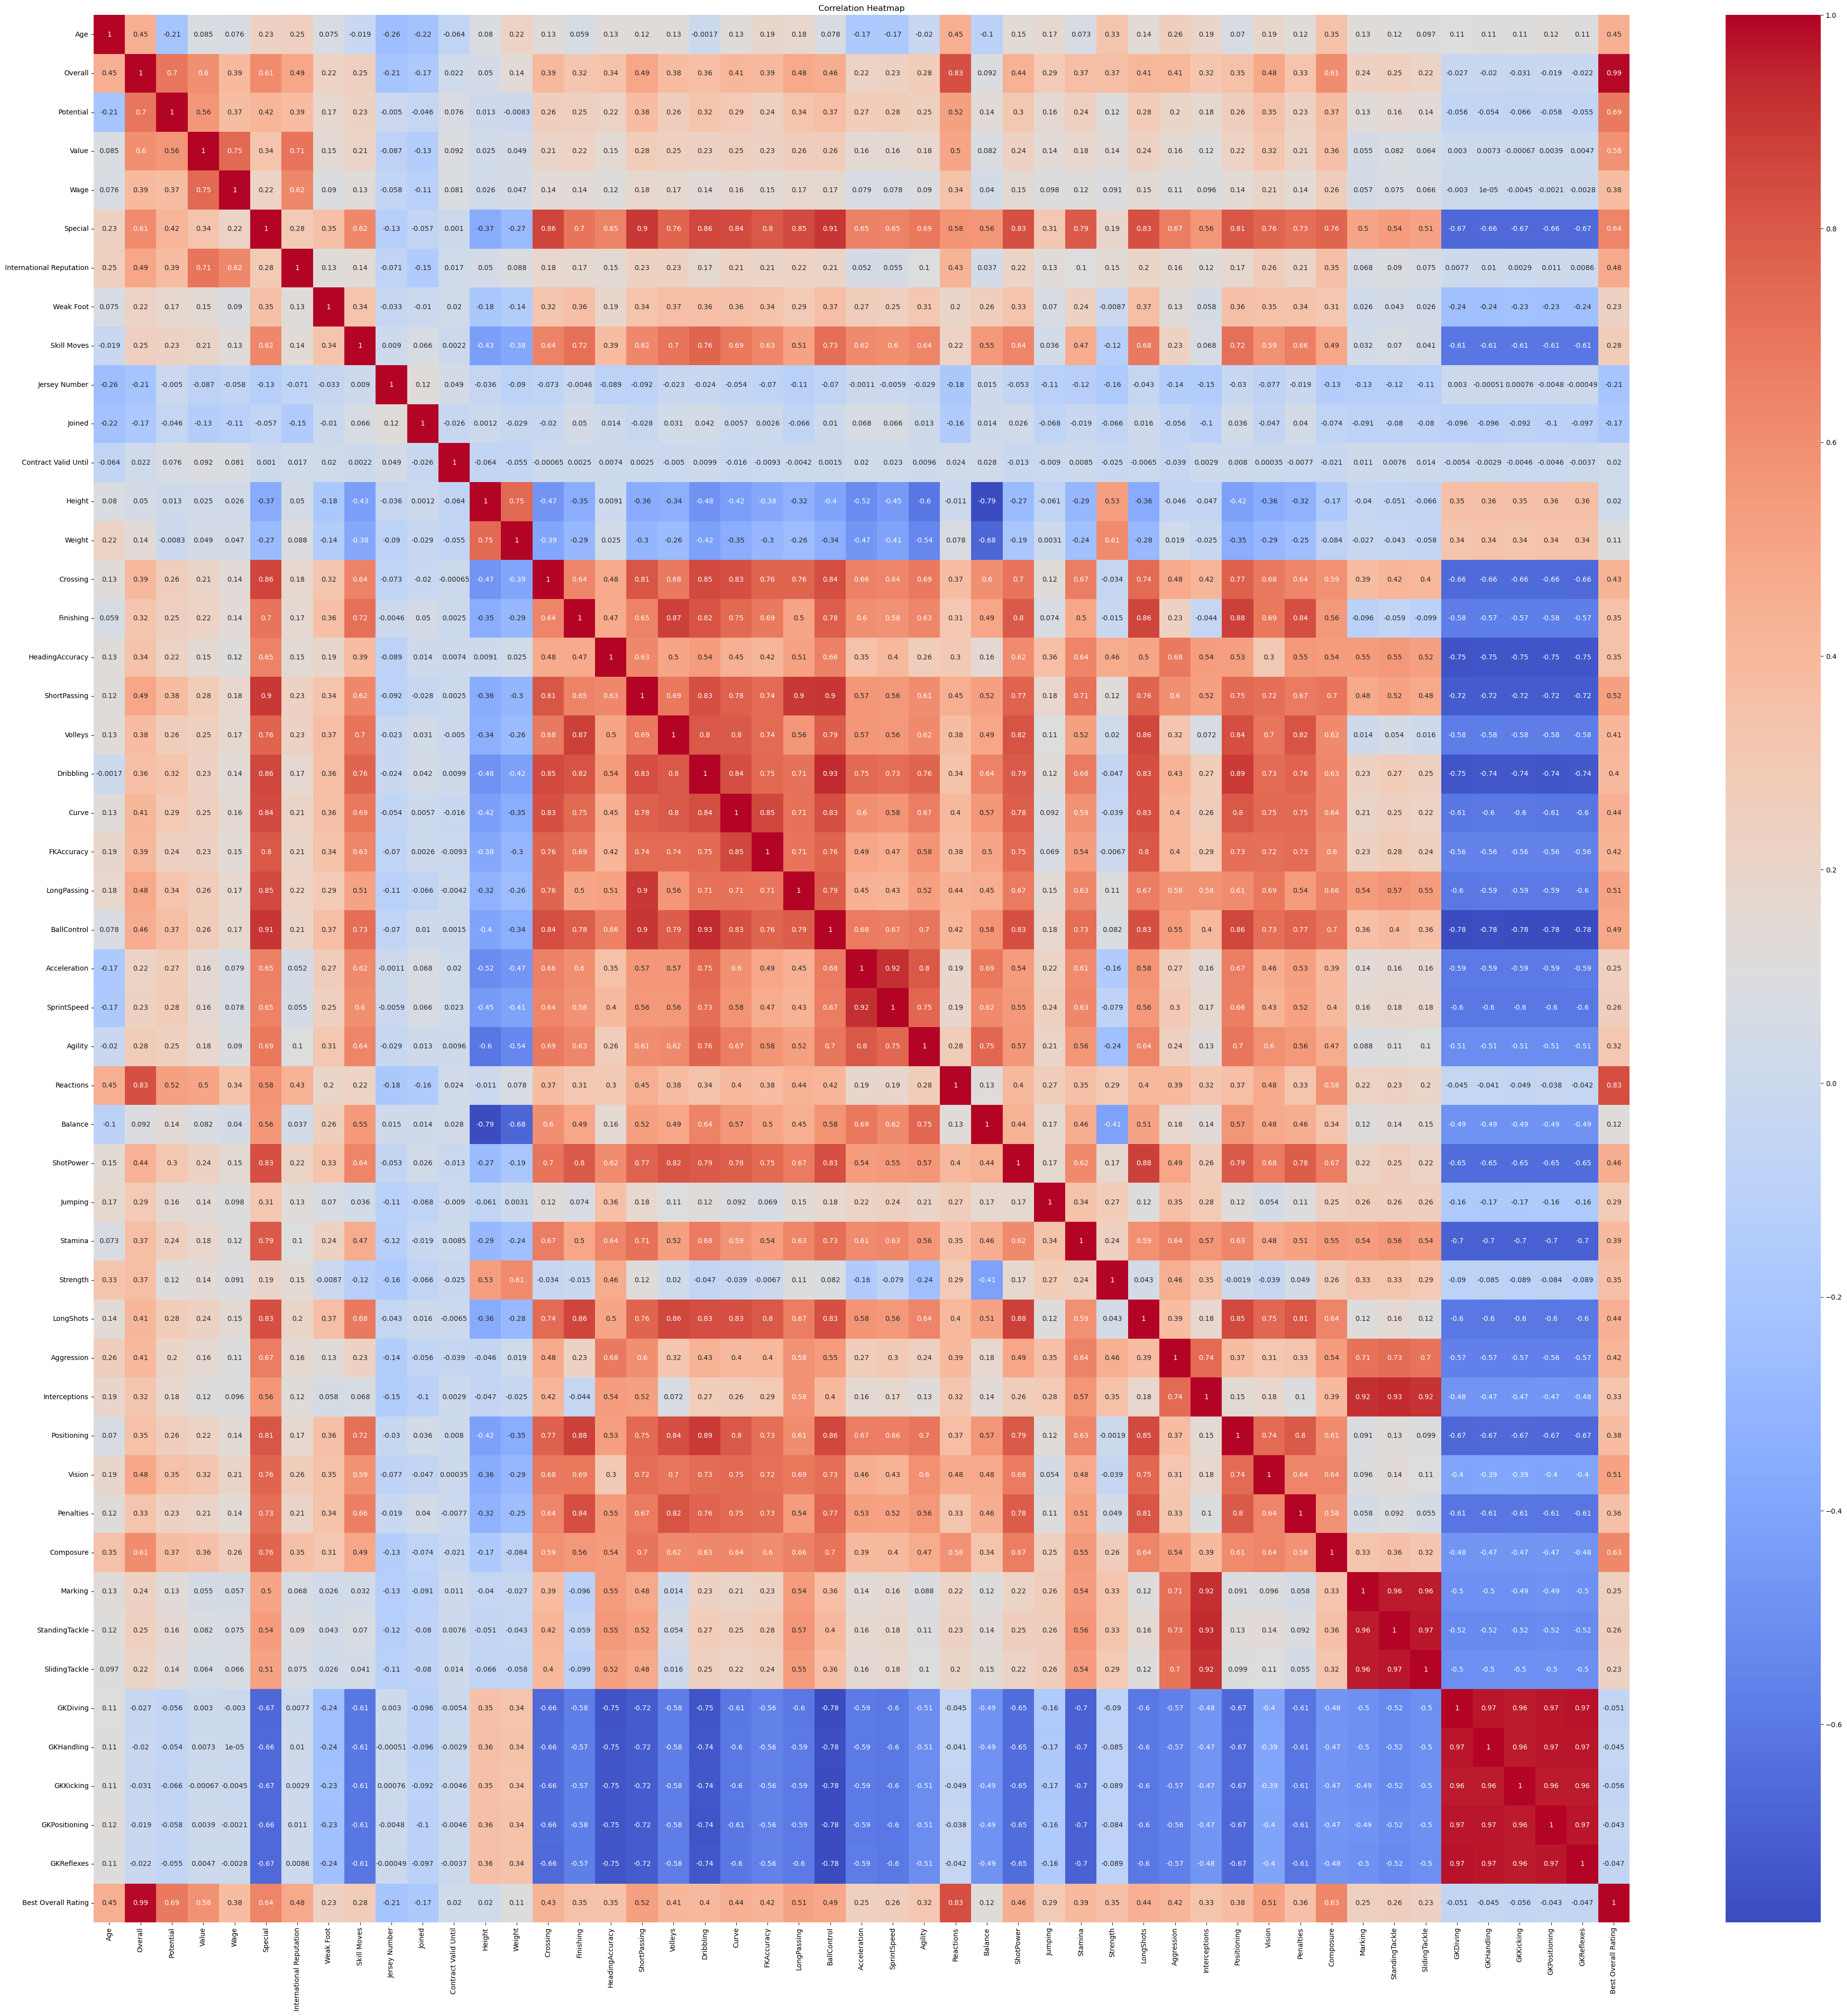

In [5256]:
plt.figure(figsize=(50, 50))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm')
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.title("Correlation Heatmap")
plt.show()